# Data Preprocessing Project - Imbalanced Classes Problem


Imbalanced classes is one of the major problems in machine learning. 

## Table of Contents


I have divided this project into various sections which are listed below:-




1.	Introduction to imbalanced classes problem

2.	Problems with imbalanced learning

3.	Example of imbalanced classes

4.	Approaches to handle imbalanced classes

5.	Python implementation to illustrate class imbalance problem

6.	Precision - Recall Curve

7.  Random over-sampling the minority class

8.	Random under-sampling the majority class

9.	Apply tree-based algorithms

10.	Random under-sampling and over-sampling with imbalanced-learn

11.	Under-sampling : Tomek links

12.	Under-sampling : Cluster Centroids

13.	Over-sampling : SMOTE

14.	Conclusion   


## 1. Imbalanced classification problem


Any real world dataset may come along with several problems. The problem of **imbalanced class** is one of them. The problem of imbalanced classes arises when one set of classes dominate over another set of classes. The former is called majority class while the latter is called minority class. It causes the machine learning model to be more biased towards majority class. It causes poor classification of minority classes. Hence, this problem throw the question of “accuracy” out of question. This is a very common problem in machine learning where we have datasets with a disproportionate ratio of observations in each class.


**Imbalanced classes problem** is one of the major problems in the field of data science and machine learning. It is very important that we should properly deal with this problem and develop our machine learning model accordingly.  If this not done, then we may end up with higher accuracy. But this higher accuracy is meaningless because it comes from a meaningless metric which is not suitable for the dataset in question. Hence, this higher accuracy no longer reliably measures model performance.  


## 2. Problems with it


The problem of imbalanced classes is very common and it is bound to happen. For example, in the above example the number of patients who do not have the rare disease is much larger than the number of patients who have the rare disease. So, the model does not correctly classify the patients who have the rare disease. This is where the problem arises.


The problem of learning from imbalanced data have new and modern approaches. This learning from imbalanced data is referred to as **imbalanced learning**.  


Significant problems may arise with imbalanced learning. These are as follows:-


1.	The class distribution is skewed when the dataset has underrepresented data.

2.	The high level of accuracy is simply misleading. In the previous example, it is high because most patients do not 
    have the disease not because of the good model.    
    
3.	There may be inherent complex characteristics in the dataset. Imbalanced learning from such dataset requires new 
    approaches, principles, tools and techniques. But, it cannot guarantee an efficient solution to the business problem.


## 3. Examples


1.	Disease detection

2.	Fraud detection

3.	Spam filtering

4.	Earthquake prediction

5.  Transportation/Airlines - Airplane failure will occur or not ?

6.  Ad - Ad click prediction dataset doesnt have high clickthrough rate


## 4. Techniques to handle imbalanced classes


In this section, I will list various approaches to deal with the imbalanced class problem. These approaches may fall under two categories – dataset level approach and algorithmic ensemble techniques approach. The various methods to deal with imbalanced class problem are listed below. I will describe these techniques in more detail in the following sections.


1.	Random Undersampling methods

2.	Random Oversampling methods

<img src="sampling.png" width="400" height="400">

3.  Tree-based algorithms

4. Resampling with imbalanced-learn

5. Under-sampling : Tomek links

<img src="toemk.png" width="400" height="400">


6. Under-sampling : Cluster Centroids

<img src="clusteroid.png" width="400" height="400">

7. Over-sampling : SMOTE

<img src="smote.png" width="400" height="400">





### Import Python libraries

I will start off by importing the required Python libraries.

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('creditcard.csv')

### Dataset description


I have used the **Credit Card Fraud Detecttion** dataset for this project. I have downloaded this project from the Kaggle website. This dataset can be found at the following url-


https://www.kaggle.com/mlg-ulb/creditcardfraud


This dataset contains transactions made by european credit card holders in September 2013. It represents transactions that occurred in two days. We have 492 fraudulent transactions out of total 284,807 transactions. This dataset is highly unbalanced, the positive class (frauds) account for only 0.172% of all transactions.


Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. So, our target variable is `Class` variable.



Given the class imbalance ratio, it is recommended to measure the accuracy using the `Area Under the Precision-Recall Curve (AUPRC)`. Confusion matrix accuracy is not meaningful for unbalanced classification.
    

In [4]:

df.shape

(284807, 31)

In [5]:

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:

df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

So, we have 492 fraudulent transactions out of total 284,807 transactions in the dataset. 
Class1 =  Fraudulent transactions and 
Class 0 = non-Fraudulent transactions.

In [7]:
# percentage of labels within the Class column

df['Class'].value_counts()/np.float(len(df))

0    0.998273
1    0.001727
Name: Class, dtype: float64

We can see that the `Class` column is highly imbalanced. It contains 99.82% labels as `0` and 0.17% labels as `1`. 

Now, I will plot the bar plot to confirm this.

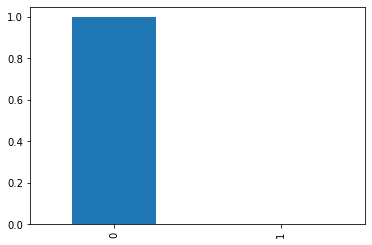

In [7]:
# view the distribution of percentages within the Class column


(df['Class'].value_counts()/np.float(len(df))).plot.bar()

The above bar plot confirms our finding that the `Class` variable is highly imbalanced. 

### Misleading accuracy for imbalanced classes


Now, I will demonstrate that accuracy is misleading for imbalanced classes. Most of the machine learning algorithms are designed to maximize the overall accuracy by default. But this maximum accuracy is misleading. We can confirm this with the following analysis.


I will fit a very simple Logistic Regression model using the default settings. I will train the classifier on the imbalanced dataset.

In [8]:
# declare feature vector and target variable

X = df.drop(['Class'], axis=1)
y = df['Class']

In [9]:
# import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression


# instantiate the Logistic Regression classifier
logreg = LogisticRegression()


# fit the classifier to the imbalanced data
clf = logreg.fit(X, y)


# predict on the training data
y_pred = clf.predict(X)


In [10]:
# import the accuracy metric
from sklearn.metrics import accuracy_score


# print the accuracy
accuracy = accuracy_score(y_pred, y)

print("Accuracy : %.2f%%" % (accuracy * 100.0))

Accuracy : 99.89%


###  99% Accuracy is not enough (Refer video in my channel) 


Thus, our Logistic Regression model for credit card fraud detection has an accuracy of 99.90%. It means that for each 100 transactions it classified, 99.90% were classified as genuine.


It does not mean that our model performance is excellent. I have previously shown that our dataset have 99.90% genuine transactions and 0.1% fraudulent transactions. Our Logistic Regression classifier predicted all transactions as genuine. 
Then we have a accuracy of 99.90% because it correctly classified 99.90% transactions as genuine.


Thus, this algorithm is 99.90% accurate. But it was horrible at classifying fraudulent transactions. So, we should have other ways to measure the model performance. One such measure is confusion matrix described below.

### Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [11]:
# import the metric
from sklearn.metrics import confusion_matrix


# print the confusion matrix
cnf_matrix = confusion_matrix(y, y_pred)


print('Confusion matrix:\n', cnf_matrix)
                             

Confusion matrix:
 [[284158    157]
 [   151    341]]


### Interpretation of confusion matrix


Now, I will interpret the confusion matrix.


-  Out of the total 284315 transactions which were predicted genuine, the classifier predicted correctly 284240 of them. It means that the classifer predicted 284240 transactions as genuine and they were actually genuine. Also, it predicted 75 transactions as genuine but it were fraudulent. So, we have `284240 True Positives(TP)` and `75 False Positives(FP)`.


-  Out of the total 492 transactions which were not predicted as genuine, the classifier predicted correctly 289 of them. It means that the classifer did not predict 289 transactions as genuine and they were actually not genuine. SO, they were fraudulent. Also, it did not predict 203 transactions as genuine but they were genuine. So, we have `289 True Negatives(TN)` and `203 False Negatives(FN)`.



-  So, out of all the 284807 transactions, the classifier correctly predicted 284529 of them. Thus, we will get the accuracy of
`(284240+289)/(284240+289+75+203) = 99.90%.`



-  But this is not the true picture. The confusion matrix allows us to obtain a true picture of the performance of the algorithm. The algorithm tries to predict the fraudulent transactions out of the total transactions. It correctly predicted 289 transactions as fraudulent out of all the 284807 transactions.  In this case the accuracy becomes `(289/284807)=0.10%.`



- Moreover, we have `203+289=492` transactions as fraudulent. The algorithm is correctly classifying 289 of them as fraudulent while it fails to predict 203 transactions which were fraudulent. In this case the accuracy becomes `(289/492)=58.74%.`


So, we can conclude that the accuracy of 99.90% is misleading because we have imbalanced classes. We need more subtle way to evaluate the performance of the model.


There is another metric called `Classification Report` which helps to evaluate model performance.

###  Classification report



**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later sections.



We can plot a classification report as follows:-

In [12]:
# import the metric
from sklearn.metrics import classification_report


# print classification report
print("Classification Report:\n\n", classification_report(y, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.68      0.69      0.69       492

    accuracy                           1.00    284807
   macro avg       0.84      0.85      0.84    284807
weighted avg       1.00      1.00      1.00    284807



### ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. 


The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.


**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN).`




**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN).`




The **Receiver Operating Characteristic Area Under Curve (ROC AUC)** is the area under the ROC curve. The higher it is, the better the model is. 


In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various probability thresholds.

### Precision - Recall Curve



Another tool to measure the classification model performance is **Precision-Recall Curve**. It is a useful metric which is used to evaluate a classifier model performance when classes are very imbalanced such as in this case. This **Precision-Recall Curve** shows the trade off between precision and recall.



In a **Precision-Recall Curve**, we plot **Precision** against **Recall**.


**Precision** is defined as the ratio of `TP to (TP + FP).`




**Recall** is defined as the ratio of `TP to (TP + FN).`




The **Precision Recall Area Under Curve (PR AUC)** is the area under the PR curve. The higher it is, the better the model is.

### Difference between ROC AUC and PR AUC


- Precision-Recall does not account for True Negatives (TN) unlike ROC AUC (TN is not a component of either Precision or Recall). 


- In the cases of class imbalance problem, we have many more negatives than positives. The Precision-Recall curve much better illustrates the difference between algorithms in the class imbalance problem cases where there are lot more negative examples than the positive examples. In these cases of class imbalances, we should use Precision-Recall Curve (PR AUC), otherwise we should use ROC AUC.


So, we can conclude that we should use PR AUC for cases where the class imbalance problem occurs. Otherwise, we should use ROC AUC.


## 6. Precision - Recall Curve 


In the previous section, we conclude that we should use `Precision-Recall Area Under Curve` for cases where the class imbalance problem exists. Otherwise, we should use `ROC-AUC (Receiver Operating Characteristic Area Under Curve)`.


Now, I will compute the `average precision score`. 

In [13]:
# compute and print average precision score

from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_pred, y)

print('Average precision-recall score : {0:0.2f}'.format(average_precision))

Average precision-recall score : 0.48


`Precision-Recall Curve` gives us the correct accuracy in this imbalanced dataset case. We can see that we have a very poor accuracy for the model.


Now, I will plot the `precision-recall curve`.

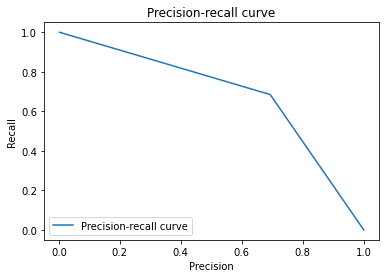

In [14]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(y_pred, y)

# create plot
plt.plot(precision, recall, label='Precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")

## Random over-sampling the minority class



**Over-sampling** is the process of randomly duplicating observations from the minority class in order to achieve a balanced dataset. So, it replicates the observations from minority class to balance the data. It is also known as **upsampling**. It may result in overfitting due to duplication of data points.  


The most common way of over-sampling is to resample with replacement. 

In [15]:
# import resample module 

from sklearn.utils import resample

Now, I will create a new dataframe with an oversampled minority class as follows:-


1. At first, I will separate observations from Class variable into different DataFrames.


2. Now, I will resample the minority class with replacement. I will set the number of samples of minority class to match 
   that of the majority class.


3. Finally, I will combine the oversampled minority class DataFrame with the original majority class DataFrame.

In [16]:
# separate the minority and majority classes
df_majority = df[df['Class']==0]
df_minority = df[df['Class']==1]

In [17]:
# oversample minority class

df_minority_oversampled = resample(df_minority, replace=True, n_samples=284315, random_state=0)      

In [18]:
# combine majority class with oversampled minority class

df_oversampled = pd.concat([df_majority, df_minority_oversampled])

In [21]:
# display new class value counts

df_oversampled['Class'].value_counts()  #now both have equal number of observations

1    284315
0    284315
Name: Class, dtype: int64

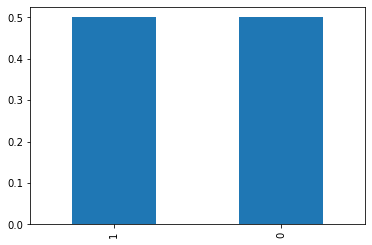

In [22]:

(df_oversampled['Class'].value_counts()/np.float(len(df_oversampled))).plot.bar()

In [23]:
# declare feature vector and target variable
X1 = df_oversampled.drop(['Class'], axis=1)
y1 = df_oversampled['Class']


# instantiate the Logistic Regression classifier
logreg1 = LogisticRegression()


# fit the classifier to the imbalanced data
clf1 = logreg1.fit(X1, y1)


# predict on the training data
y1_pred = clf1.predict(X1)


# print the accuracy
accuracy1 = accuracy_score(y1_pred, y1)

print("Accuracy : %.2f%%" % (accuracy1 * 100.0))


Accuracy : 94.51%


## Random under-sampling the majority class


The **under-sampling** methods work with the majority class. In these methods, we randomly eliminate instances of the majority class. It reduces the number of observations from majority class to make the dataset balanced. This method is applicable when the dataset is huge and reducing the number of training samples make the dataset balanced.


The most common technique for under-sampling is resampling without replacement.


I will proceed exactly as in the case of random over-sampling.

In [23]:
# separate the minority and majority classes
df_majority = df[df['Class']==0]
df_minority = df[df['Class']==1]

In [24]:
# undersample majority class

df_majority_undersampled = resample(df_majority, replace=True, n_samples=492, random_state=0) 

In [25]:
# combine majority class with oversampled minority class

df_undersampled = pd.concat([df_minority, df_majority_undersampled])

In [26]:
# display new class value counts

df_undersampled['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

Now, we can see that the new dataframe `df_undersampled` has fewer observations than the original one `df` and the ratio of the two classes is now 1:1.

Again, I will train a model using Logistic Regression classifier.

In [27]:
# declare feature vector and target variable
X2 = df_undersampled.drop(['Class'], axis=1)
y2 = df_undersampled['Class']


# instantiate the Logistic Regression classifier
logreg2 = LogisticRegression()


# fit the classifier to the imbalanced data
clf2 = logreg2.fit(X2, y2)


# predict on the training data
y2_pred = clf2.predict(X2)


# print the accuracy
accuracy2 = accuracy_score(y2_pred, y2)

print("Accuracy : %.2f%%" % (accuracy2 * 100.0))


Accuracy : 93.90%


Again, we can see that we have a slightly decreased accuracy but it is more meaningful now.

## 9. Apply Tree-Based Algorithms

In [28]:
# declare input features (X) and target variable (y)
X4 = df.drop('Class', axis=1)
y4 = df['Class']


In [29]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier


In [30]:
# instantiate the classifier 
clf4 = RandomForestClassifier()


In [31]:
# fit the classifier to the training data
clf4.fit(X4, y4)
 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
# predict on training set
y4_pred = clf4.predict(X4)

In [33]:
# compute and print accuracy
accuracy4 = accuracy_score(y4_pred, y4)
print("Accuracy : %.2f%%" % (accuracy4 * 100.0))

Accuracy : 99.99%


In [34]:
# compute and print ROC-AUC

from sklearn.metrics import roc_auc_score

y4_prob = clf4.predict_proba(X4)
y4_prob = [p[1] for p in y4_prob]
print("ROC-AUC : " , roc_auc_score(y4, y4_prob))

ROC-AUC :  0.9999992243516689


## 10.	Random under-sampling and over-sampling with imbalanced-learn



There is a Python library which enable us to handle the imbalanced datasets. It is called **Imbalanced-Learn**. It is a Python library which contains various algorithms to handle the imbalanced datasets. It can be easily installed with the `pip` command. This library contains a `make_imbalance` method to exasperate the level of class imbalance within a given dataset.


Now, I will demonstrate the technique of random undersampling and oversampling with imbalanced learn. 


First of all, I will import the `imbalanced learn` library.


In [35]:
# import imbalanced learn library

import imblearn

Then, I will import the `RandomUnderSampler` class. It is a quick and easy way to balance the data by randomly selecting a subset of data for the targeted classes. 

In [36]:
# import RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

# instantiate the RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)


# fit the RandomUnderSampler to the dataset
X_rus, y_rus, id_rus = rus.fit_sample(X, y)


In [37]:
# print the removed indices
print("Removed indices: ", id_rus)

Removed indices:  [194966 158207 239580  47508 164976   4059 244121   4712 129277 195768
 220169 159815 157385 226067 122412 186077 216500  36600 232308  61840
 216772 269873  49886 138921  64943 104600 211825 162198 236942 256405
 116084 165304 254299 217511  91142  67255   2349 132109 227416  75785
  23316 131322 177311  61790  91798 103220 103526  33083 148175 117300
 117437 251709 243617 136620  78369 177568 157649 150080 137441 277646
    988 213741 213602 264759 102266 166026 192696 269500 182970   7029
 138352 262530  99000 159383 225900 249330  14929 117795 252069  86625
 249970  58096 109913 195548  30897   8690  22107 261540 111780 105375
  62971 201607 177552  30981  84358 226572   7675  64315 172103 171021
  72979 208177  38876  63638 180868  76338 121268 264548 117134 182323
 254834 166395 235471 204943   9850 232780  83992  20930  54009 198064
 133443  81674 207050 274408 266475 165966 277813  23758  49157 222434
 178038   7746  72809 101544 198536 158586 102708 263512  6

The above indices are removed from the original dataset.

Now, I will demonstrate random oversampling. The process will be the same as random undersampling.

In [38]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_ros, y_ros = ros.fit_sample(X, y)

In [39]:
print(X_ros.shape[0] - X.shape[0], 'new random points generated')

283823 new random points generated


## 11.	Under-sampling : Tomek links


Tomek links are defined as the two observations of different classes which are nearest neighbours of each other.


The figure below illustrate the concept of Tomek links-



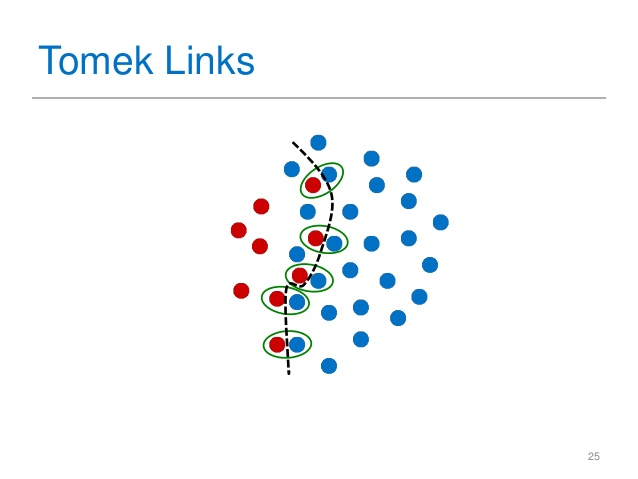



We can see in the above image that the Tomek links (circled in green) are given by the pairs of red and blue data points that are nearest neighbors. Most of the classification algorithms face difficulty due to these points. So, I will remove these 
points and increase the separation gap between two classes.  Now, the algorithms produce more reliable output.

This technique will not produce a balanced dataset. It will simply clean the dataset by removing the Tomek links. It may result in an easier classification problem. Thus, by removing the Tomek links, we can improve the performance of the classifier even if we don’t have a balanced dataset.


So, removing the Tomek links increases the gap between the two classes and thus facilitate the classification process.


In the following code, I will use `ratio=majority` to resample the majority class.


In [40]:
from imblearn.under_sampling import TomekLinks


In [41]:
tl = TomekLinks(return_indices=True, ratio='majority')


In [42]:
X_tl, y_tl, id_tl = tl.fit_sample(X, y)


In [43]:
print('Removed indexes:', id_tl)

Removed indexes: [     0      1      2 ... 284804 284805 284806]


## 12. Under-sampling : Cluster Centroids


In this technique, we perform under-sampling by generating centroids based on clustering methods. The dataset will be grouped
by similarity, in order to preserve information.

In this example, I have passed the {0: 10} dict for the parameter ratio. It preserves 10 elements from the majority class (0), and all minority class (1) .

In [44]:
from imblearn.under_sampling import ClusterCentroids

In [45]:
cc = ClusterCentroids(ratio={0: 10})

In [46]:
X_cc, y_cc = cc.fit_sample(X, y)

In [47]:
print(X.shape[0] - X_cc.shape[0], 'New points undersampled under Cluster Centroids')

284305 New points undersampled under Cluster Centroids


## 13.	Over-sampling : SMOTE



In the context of synthetic data generation, there is a powerful and widely used method known as **synthetic minority oversampling technique** or **SMOTE**. Under this technique, artificial data is created based on feature space. 
Artificial data is generated with bootstrapping and k-nearest neighbours algorithm.  It works as follows:-


1.	First of all, we take the difference between the feature vector (sample) under consideration and its nearest neighbour.


2.	Then we multiply this difference by a random number between 0 and 1.


3.	Then we add this number to the feature vector under consideration.


4.	Thus we select a random point along the line segment between two specific features.


The concept of **SMOTE** can best be illustrated with the following figure:-


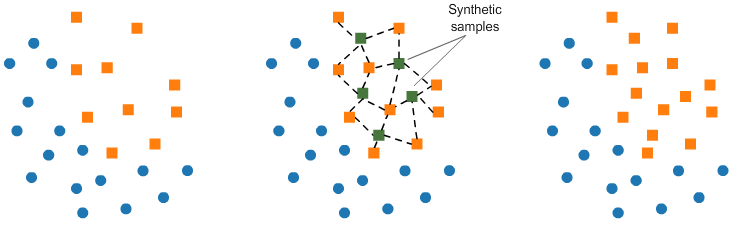


So, **SMOTE** generates new observations by interpolation between existing observations in the dataset.



In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
smote = SMOTE(ratio='minority')

In [50]:
X_sm, y_sm = smote.fit_sample(X, y)

In [51]:
print(X_sm.shape[0] - X.shape[0], 'New points created under SMOTE')

283823 New points created under SMOTE


## 14. Conclusion


In this jupyter notebook, I have discussed various approaches to deal with the problem of imbalanced classes. These are `random oversampling`, `random undersampling`, `tree-based algorithms`, `resampling with imbalanced learn library`, `under-sampling : Tomek links`,  `under-sampling : Cluster Centroids` and `over-sampling : SMOTE`.


Some combination of these approaches will help us to create a better classifier.  Simple sampling techniques may handle slight imbalance whereas more advanced methods like ensemble methods are required for extreme imbalances.  The most effective technique will vary according to the dataset.


So, based on the above discussion, we can conclude that there is no one solution to deal with the imbalanced classes problem. 
We should try out multiple methods to select the best-suited sampling techniques for the dataset in hand. The most effective technique will vary according to the characteristics of the dataset.
